In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP
using HDF5

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT

In [3]:
include("../model-41/likelihood.jl")
include("../model-41/utill_model.jl")
include("../utill.jl")

plot_projections (generic function with 1 method)

In [4]:
conv_mat = load("../../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"],
);


In [5]:
param_truth = (
    tr_size = [0.15, 0.15], 
    tr_size_2 = [0.10, 0.10], 
    ang_spr = [6, 6], 
    ang_spr_2 = [3, 3], 
    mixt_pow = 0.7, 
    waist = [3.15], 
    waist_2 = [2.9], 
    algmx = [36.0, 37.0, 19.0, 33.0], 
    algmy = [33.0, 34.0, 21.0, 35.0], 
    cam4_ped = 26.0, 
    cam4_light_fluct = 1.50, 
    cam4_light_amp = 8.90, 
    resx = [1, 1, 1], 
    resy = [1, 1, 1], 
    cam4_resx = 3.0, 
    cam4_resy = 3.0, 
    psx = [27.1, 21.6, 114.0], 
    psy = [30.5, 23.4, 125.0], 
    cam4_psx = 121.8, 
    cam4_psy = 120.0, 
    light_amp = [8.5, 11.1, 2.5], 
    s_cam = [0.0, 1.478, 15.026, 23.115]
);

In [10]:
event = generate_event(param_truth, 27.0, conv_matrices)

(cam_1 = [1.0 4.0 … 618.0 0.0; 5.0 6.0 … 3.0 19.0; … ; 249.0 19.0 … 15.0 2.0; 5.0 31.0 … 44.0 12.0], cam_2 = [1.0 2.0 … 2.0 1.0; 0.0 0.0 … 0.0 2.0; … ; 1.0 145.0 … 1.0 0.0; 0.0 0.0 … 7.0 11.0], cam_3 = [79.0 64.0 … 9.0 0.0; 5.0 3.0 … 26.0 12.0; … ; 4.0 62.0 … 10.0 1.0; 2.0 3.0 … 273.0 16.0], cam_4 = [28.0 43.0 … 17.0 27.0; 11.0 23.0 … 21.0 33.0; … ; 25.0 28.0 … 20.0 42.0; 8.0 21.0 … 21.0 30.0], population = 27.0)

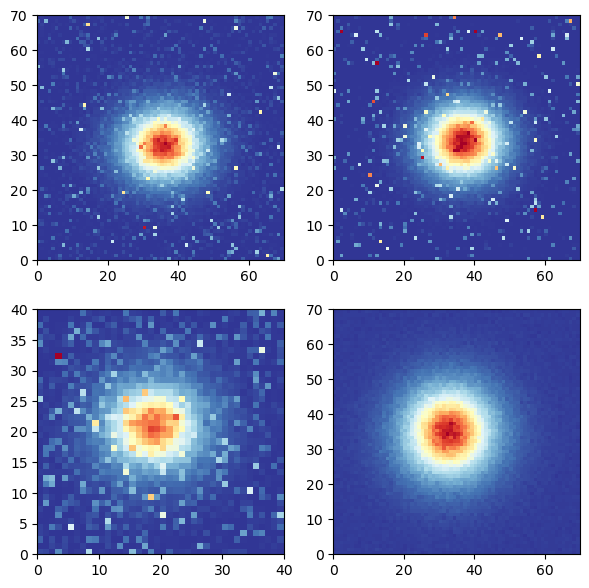

PyObject <matplotlib.collections.QuadMesh object at 0x7fdfd82cc2b0>

In [11]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event.cam_4, cmap="RdYlBu_r")

In [12]:
@save "../../data/sampling_results/Benchmark-6/event-41.jld" event

In [35]:
β1= 0.015
β2 = 0.0077
β3 = 0.0058 

# prior = NamedTupleDist(
#         tr_size = [truncated(Normal(0.145, 0.04), 0.06, 0.19), truncated(Normal(0.145, 0.04), 0.06, 0.19)],
#         tr_size_2 = [truncated(Normal(0.145, 0.04), 0.06, 0.19), truncated(Normal(0.145, 0.04), 0.06, 0.19)],
#         ang_spr = [truncated(Normal(6, 2.0), 4.0, 7.0), truncated(Normal(6.0, 2.0), 4.0, 7.0)],
#         ang_spr_2 = [truncated(Normal(3.0, 2.0), 1.0, 4.0), truncated(Normal(3.0, 2.0), 1.0, 4.0)],
#         mixt_pow =  0.50 .. 1.0 ,
#         waist = [truncated(Normal(3.15, 0.03), 2.65, 3.5)],
#         waist_2 = [truncated(Normal(2.9, 0.03), 2.65, 3.5)], # 11
#         algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#         algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#         cam4_ped = 4.0 .. 40.0,
#         cam4_light_fluct = 1.0 .. 3.0,
#         cam4_light_amp = 1.6 .. 9.9, 
#         resx = [1, 1, 1], # 23, 24, 25, 
#         resy = [1, 1, 1], # 26,27, 28, 
#         cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
#         cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
#         psx = [27.1, 21.6, 114.0], # 31, 32, 33
#         psy = [30.5, 23.4, 125.0], # 34, 35, 36
#         cam4_psx = 121.8, # 37
#         cam4_psy = 120.0, # 38
#         light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
#         s_cam = [0.0, 1.478, 15.026, 23.1150],
#     );

prior = NamedTupleDist(
        tr_size = [0.13 .. 0.17, 0.13 .. 0.17],
        tr_size_2 = [0.08 .. 0.11, 0.08 .. 0.11],
        ang_spr = [5 .. 7, 5 .. 7],
        ang_spr_2 = [2 .. 4, 2 .. 4],
        mixt_pow =  0.50 .. 1.0 ,
        waist = [3.0 .. 3.3],
        waist_2 = [2.8 .. 3.0], # 11
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9,
        resx = [1, 1, 1], 
        resy = [1, 1, 1], 
        cam4_resx = 2.0 .. 4.00, 
        cam4_resy = 2.0 .. 4.00, 
        psx = [27.1, 21.6, 114.0], 
        psy = [30.5, 23.4, 125.0], 
        cam4_psx = 121.8, 
        cam4_psy = 120.0, 
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.115]
    );

In [36]:
"""
    Log-Likelihood of the beamline (4 cameras included)
"""
function log_lik_ndiff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_discrete,
    cv_1 = cv_mat.cam_1,
    cv_2 = cv_mat.cam_2,
    cv_3 = cv_mat.cam_3,
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        return LogDVal(ll)
    end
        
end

log_likelihood = log_lik_ndiff()

#58 (generic function with 1 method)

In [37]:
posterior = PosteriorDensity(log_likelihood, prior)

tuning = AdaptiveMHTuning(
    λ = 0.5,
    α = ClosedInterval(0.15,0.25),
    β = 1.5,
    c = ClosedInterval(1e-4,1e2),
    r = 0.5,
)

convergence = BrooksGelmanConvergence(
    threshold = 1.1,
    corrected = false
)

init = MCMCChainPoolInit(
    init_tries_per_chain = ClosedInterval(50,150),
    max_nsamples_init = 500,
    max_nsteps_init = 500,
    max_time_init = Inf
)

burnin = MCMCMultiCycleBurnin(
    max_nsamples_per_cycle = 10000,
    max_nsteps_per_cycle = 10000,
    max_time_per_cycle = Inf,
    max_ncycles = 130
)

nsamples = 1*10^5
nchains = 4

sampler = MetropolisHastings(tuning=tuning,)

algorithm = MCMCSampling(sampler=sampler, 
    nchains=nchains, 
    init=init, 
    burnin=burnin, 
    convergence=convergence
);

In [38]:
@time samples_tot = bat_sample(
    posterior, nchains*nsamples, algorithm,
    max_neval = nchains*nsamples,
    max_time = Inf,
);

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/chain_pool_init.jl:63
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/chain_pool_init.jl:185
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:38
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 4 fini

387.139675 seconds (1.00 G allocations: 901.548 GiB, 15.12% gc time)


In [40]:
samples = samples_tot.result;

In [48]:
minimum(bat_eff_sample_size(unshaped.(samples)).result)

648.0871223094217

In [49]:
size(flatview(unshaped.(samples.v)))

(27, 94498)

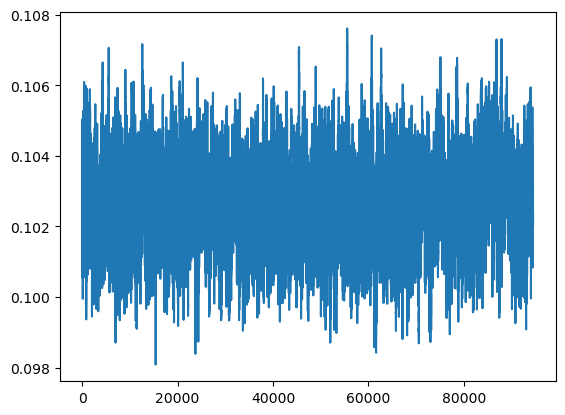

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf55f82790>

In [50]:
plot(flatview(unshaped.(samples.v))[3,:])

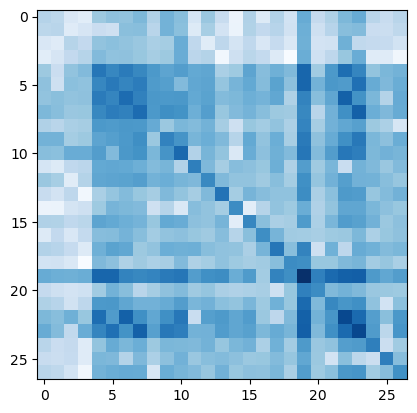

PyObject <matplotlib.image.AxesImage object at 0x7fdf55f66d00>

In [51]:
plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

In [52]:
BAT.bat_write("../../data/sampling_results/Benchmark-6/samples-41.hdf5", unshaped.(samples))

In [53]:
flat_truth = vcat([i for i in param_truth]...)
flat_mode = vcat([i for i in mode(samples)[1]]...) ./flat_truth
flat_std = vcat([i for i in std(samples)[1]]...)./flat_truth;

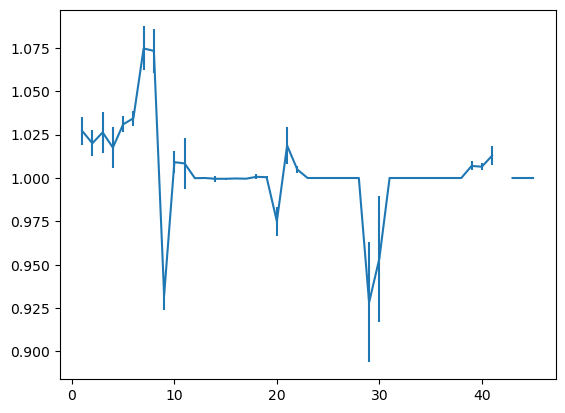

(PyObject <matplotlib.lines.Line2D object at 0x7fdf55ec05b0>, (), (PyObject <matplotlib.collections.LineCollection object at 0x7fdf55ec0a60>,))

In [54]:
plt.errorbar(1:length(flat_mode), flat_mode, yerr=flat_std )

In [55]:
bat_marginalmode(samples).result

ShapedAsNT((tr_size = [0.153625, 0.152775], tr_size_2 = [0.102675, 0.101425], ang_spr = [6.205, 6.2135], ang_spr_2 = [3.213, 3.239], mixt_pow = 0.65225, waist = [3.1845], waist_2 = [2.9604999999999997], algmx = [35.9945, 36.9965, 18.991, 32.9855], algmy = [32.9825, 33.9905, 21.009, 35.0205], cam4_ped = 25.375, cam4_light_fluct = 1.5245, cam4_light_amp = 8.932500000000001, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 2.8275, cam4_resy = 2.8725, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.555499999999999, 11.1715, 2.53275], s_cam = [0.0, 1.478, 15.026, 23.115]))

In [56]:
mean(samples)[1]

(tr_size = [0.15363523224263856, 0.15271570260581782], tr_size_2 = [0.1026129765564677, 0.10168110127280978], ang_spr = [6.2021912351338635, 6.217941400639594], ang_spr_2 = [3.2180445524175516, 3.2386468158475346], mixt_pow = 0.6519844403083339, waist = [3.179731867400006], waist_2 = [2.9322035965604876], algmx = [35.99780747151639, 36.99838234755644, 18.997972456552013, 32.99149344830799], algmy = [32.978089944701885, 33.98947606249915, 21.01440243481306, 35.023547414361026], cam4_ped = 25.376723309879967, cam4_light_fluct = 1.5268725338439366, cam4_light_amp = 8.930722147375596, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 2.798721573370986, cam4_resy = 2.8380118411851507, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.556025534451619, 11.16840074305127, 2.5323155588214057], s_cam = [0.0, 1.478, 15.026, 23.115])

In [57]:
std(samples)[1]

(tr_size = [0.001206495548400404, 0.0011169952168937516], tr_size_2 = [0.001177487807129517, 0.0011933926883687781], ang_spr = [0.028195388859550714, 0.02617404287940341], ang_spr_2 = [0.03799242529390262, 0.038131271837008145], mixt_pow = 0.005843583911618772, waist = [0.020349657303415633], waist_2 = [0.04268008980011691], algmx = [0.021908722137299073, 0.017206800683478997, 0.030940355159309988, 0.015566401125106117], algmy = [0.017946251711985568, 0.014851520730002447, 0.028803538182944195, 0.01573646507083701], cam4_ped = 0.2144894570527672, cam4_light_fluct = 0.015598522074356549, cam4_light_amp = 0.017576432217357666, resx = 3-element Fill{Int64}: entries equal to 0, resy = 3-element Fill{Int64}: entries equal to 0, cam4_resx = 0.1038096630810491, cam4_resy = 0.10904748714671177, psx = 3-element Fill{Float64}: entries equal to 0.0, psy = 3-element Fill{Float64}: entries equal to 0.0, cam4_psx = 0.0, cam4_psy = 0.0, light_amp = [0.022338779293236195, 0.02278317070536962, 0.013647

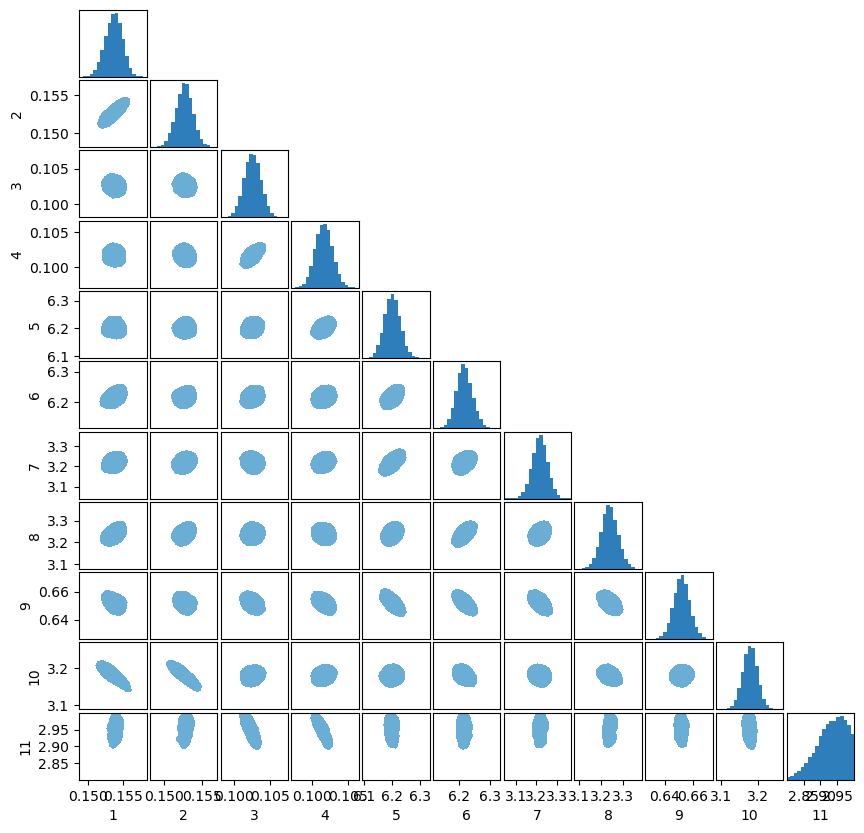

In [58]:
dims = [1,2,3,4,5,6,7,8,9,10,11]
# dims = [1,2,3,4,5,]
names = [1,2,3,4,5,6,7,8,9,10, 11]
# levels = [0.01, 0.55, 0.9, 0.95,  1,]
levels = [0.001, 0.90, 1,]
figsize = (10,10)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

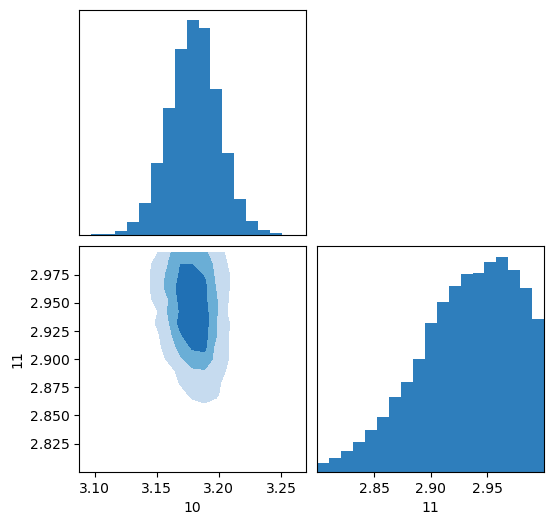

In [59]:
dims = [10,11,]
names = [10,11,]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [ ]:
data = [sort(randn(500)) for i in 1:5];
quant = [(0.1, 0.9) for i in 1:5]

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

parts = ax.violinplot(data, widths = 0.9, vert=true, showmeans=true, showextrema=true, quantiles=quant)

for pc in parts["bodies"]
    pc.set_facecolor("gray")
    pc.set_edgecolor("black")
    pc.set_alpha(0.5)
    pc.set_linewidth(2)
end

In [ ]:
? plt.violinplot

In [ ]:
? plt.collections.PolyCollection

In [60]:
labels = [L"\sigma_x", L"\sigma_y", L"\sigma_x", L"\sigma_y",  L"\sigma'_x", L"\sigma'_y", L"\sigma'_x", L"\sigma'_y", L"\alpha", L"s_1", L"s_2",
    L"\mu_{x1}", L"\mu_{x2}", L"\mu_{x3}", L"\mu_{x4}", L"\mu_{y1}", L"\mu_{y2}", L"\mu_{y3}", L"\mu_{y4}", 
    "ped", L"\alpha", L"I_4", L"\Delta_x", L"\Delta_y", L"I_1", L"I_2", L"I_3"];

In [61]:
samples_uw = bat_sample(samples, 10^4).result;

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/algotypes/bat_default.jl:44
┌ Info: Using sampling algorithm OrderedResampling()
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/algotypes/bat_default.jl:44


In [62]:
truth = [0.15, 0.15, 0.10, 0.10, 6.0, 6.0, 3.0, 3.0, 0.7, 3.15, 2.9, 36.0, 37.0, 19.0, 33.0, 33.0, 34.0, 21.0, 35.0, 26.0, 1.5, 8.9, 3, 3, 8.5, 11.1, 2.5];

In [63]:
samples_flat = flatview(unshaped.(samples_uw.v)) ./ truth;

In [64]:
data = [i for i in eachrow(samples_flat)];
quant = [(0.01, 0.99) for i in eachrow(samples_flat)];

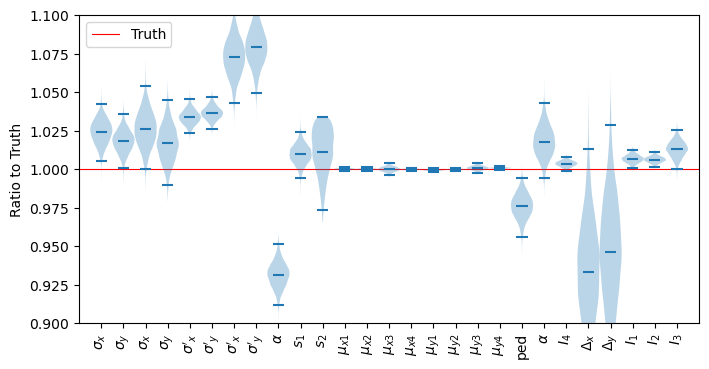

(0.9, 1.1)

In [65]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.axhline(1.0, linestyle="-", lw=0.8, color="red", alpha=1.0, zorder=0, label="Truth")

parts = ax.violinplot(data, widths = 1.0, vert=true, showmeans=true, showextrema=false, quantiles=quant)

# for pc in parts["bodies"]
#     pc.set_facecolor("gray")
#     pc.set_edgecolor("black")
#     pc.set_alpha(0.5)
#     pc.set_linewidth(2)
# end

ax.set_xlim(0.0, length(data)+1)

ax.set_xticks(collect(Base.OneTo(length(data))))
ax.set_xticklabels(labels, rotation = 90, ha="center")
ax.legend(loc="upper left")
ax.set_ylabel("Ratio to Truth")

ax.set_ylim(0.9, 1.1)

In [ ]:
plot_projections(conv_matrices, event, event, mean(samples)[1], isnontr = true)